In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255

In [4]:
import keras
y_train = keras.utils.to_categorical(y_train,10)
y_test = keras.utils.to_categorical(y_test,10)

In [5]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation,Dropout
model = Sequential()
model.add(Flatten(input_shape=(28,28)))

model.add(Dense(units=128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(units=10))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [7]:
from keras import optimizers
sgd = optimizers.SGD(lr = 0.001)
model.compile(optimizer=sgd,metrics=['accuracy'],loss ='categorical_crossentropy')

In [8]:
history=model.fit(x_train,y_train,epochs=3,batch_size=32,validation_split=0.25)

Instructions for updating:
Use tf.cast instead.
Train on 45000 samples, validate on 15000 samples
Epoch 1/10
45000/45000 [==============================] - 8s 169us/step - loss: 2.1144 - acc: 0.3004 - val_loss: 1.7862 - val_acc: 0.6625
Epoch 2/10
45000/45000 [==============================] - 5s 102us/step - loss: 1.5473 - acc: 0.5937 - val_loss: 1.1218 - val_acc: 0.7805
Epoch 3/10
45000/45000 [==============================] - 5s 106us/step - loss: 1.0866 - acc: 0.7003 - val_loss: 0.7712 - val_acc: 0.8295
Epoch 4/10
45000/45000 [==============================] - 5s 105us/step - loss: 0.8595 - acc: 0.7477 - val_loss: 0.6138 - val_acc: 0.8534
Epoch 5/10
45000/45000 [==============================] - 5s 107us/step - loss: 0.7356 - acc: 0.7816 - val_loss: 0.5295 - val_acc: 0.8679
Epoch 6/10
45000/45000 [==============================] - 5s 109us/step - loss: 0.6618 - acc: 0.8032 - val_loss: 0.4782 - val_acc: 0.8741
Epoch 7/10
45000/45000 [==============================] - 5s 108us/step - 

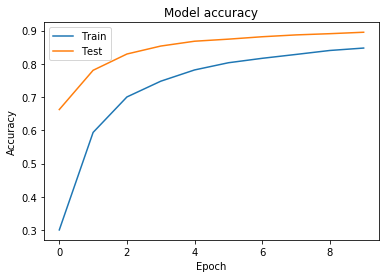

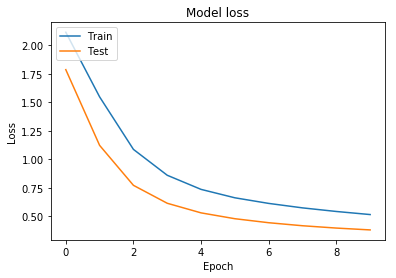

In [12]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 43us/step


[0.37063079102039337, 0.8987]

In [11]:
model.evaluate(x_train,y_train)

60000/60000 [==============================] - 2s 40us/step


[0.3892783490121365, 0.8929]